In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report, roc_auc_score, roc_curve
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.preprocessing import Normalizer
from sklearn import preprocessing
from sklearn.decomposition import PCA

In [2]:
data = pd.read_excel('./Acoustic_Extinguisher_Fire_Dataset.xlsx')

data.dropna(inplace=True)

In [3]:
data.head()

,SIZE,FUEL,DISTANCE,DESIBEL,AIRFLOW,FREQUENCY,STATUS
0,1,gasoline,10,96,0.0,75,0
1,1,gasoline,10,96,0.0,72,1
2,1,gasoline,10,96,2.6,70,1
3,1,gasoline,10,96,3.2,68,1
4,1,gasoline,10,109,4.5,67,1


In [4]:
print(data.dtypes)
print(len(data))

SIZE           int64
FUEL          object
DISTANCE       int64
DESIBEL        int64
AIRFLOW      float64
FREQUENCY      int64
STATUS         int64
dtype: object
17442


In [5]:
label_encoder = preprocessing.LabelEncoder()
data['FUEL'] = label_encoder.fit_transform(data['FUEL'])

In [6]:
print(data.dtypes)

SIZE           int64
FUEL           int32
DISTANCE       int64
DESIBEL        int64
AIRFLOW      float64
FREQUENCY      int64
STATUS         int64
dtype: object


In [7]:
data.isnull().sum()*100/len(data)

SIZE         0.0
FUEL         0.0
DISTANCE     0.0
DESIBEL      0.0
AIRFLOW      0.0
FREQUENCY    0.0
STATUS       0.0
dtype: float64

<Axes: >

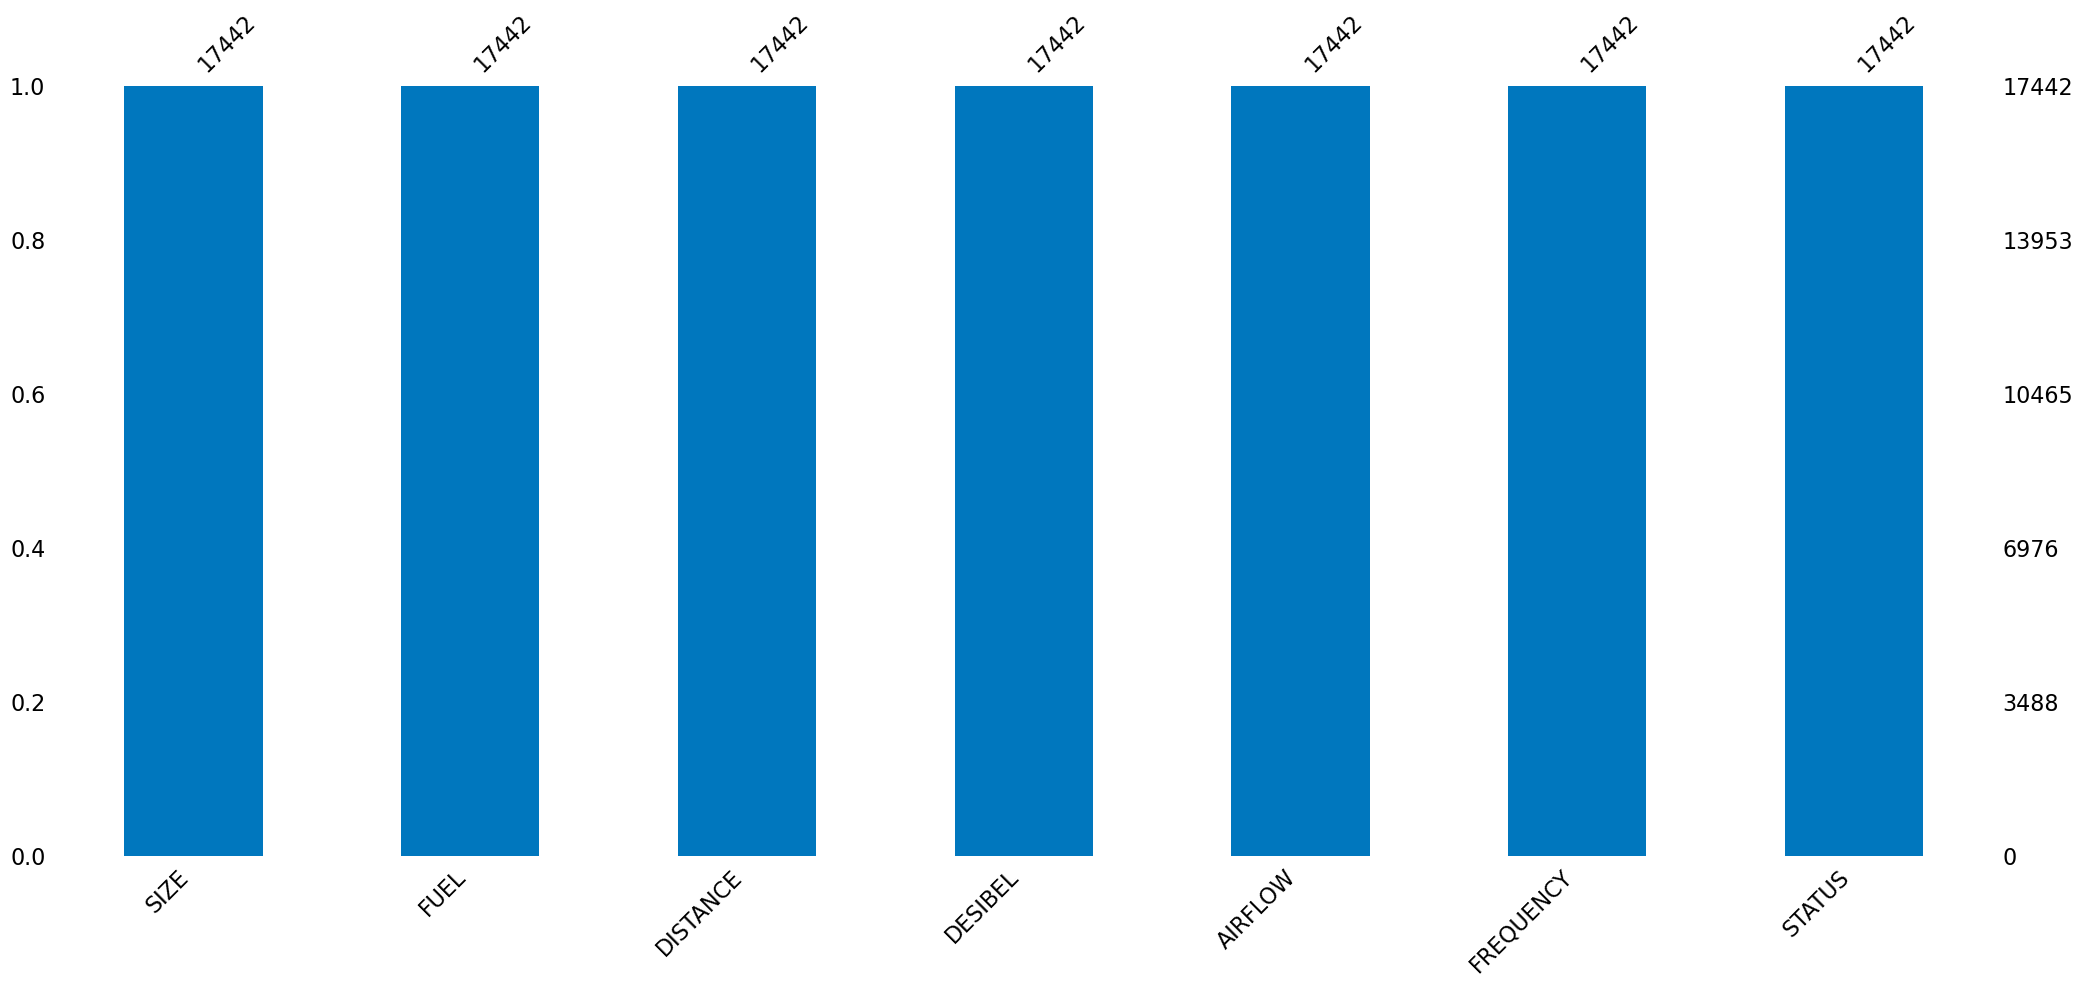

In [8]:
msno.bar(data, color="#0077be")

In [9]:
x = data[['SIZE','FUEL','DISTANCE','DESIBEL','AIRFLOW','FREQUENCY']]
y = data['STATUS']

In [10]:
print(x)
len(x)

       SIZE  FUEL  DISTANCE  DESIBEL  AIRFLOW  FREQUENCY
0         1     0        10       96      0.0         75
1         1     0        10       96      0.0         72
2         1     0        10       96      2.6         70
3         1     0        10       96      3.2         68
4         1     0        10      109      4.5         67
...     ...   ...       ...      ...      ...        ...
17437     7     2       190       86      2.2          5
17438     7     2       190       84      2.0          4
17439     7     2       190       80      1.5          3
17440     7     2       190       76      0.4          2
17441     7     2       190       72      0.0          1

[17442 rows x 6 columns]


17442

In [11]:
print(y)
len(y)

0        0
1        1
2        1
3        1
4        1
        ..
17437    0
17438    0
17439    0
17440    0
17441    0
Name: STATUS, Length: 17442, dtype: int64


17442

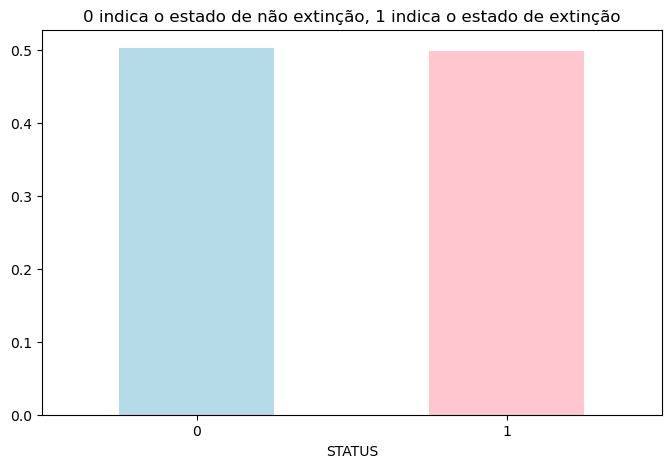

In [12]:
fig = plt.figure(figsize = (8,5))
data.STATUS.value_counts(normalize = True).plot(kind='bar', color= ['lightblue','pink'], alpha = 0.9, rot=0)
plt.title('0 indica o estado de não extinção, 1 indica o estado de extinção')
plt.show()

In [13]:
pca = PCA(n_components=0.95)
pca.fit(x)

PCA(n_components=0.95)

In [14]:
Z = pca.transform(x)
Z

array([[-89.36616167,  41.75340715],
       [-89.36359154,  38.83833634],
       [-89.52135786,  36.78686677],
       ...,
       [ 90.72760631, -30.77220896],
       [ 90.94162187, -32.62806336],
       [ 91.11270058, -34.51301865]])

In [15]:
Z.mean(axis=0)

array([ 6.82107990e-15, -1.09583761e-16])

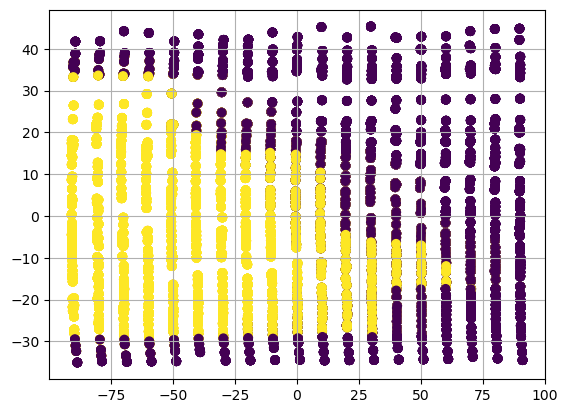

In [16]:
plt.scatter(Z[:,0],Z[:,1],c=y)
plt.grid()

In [17]:
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size =0.2, stratify = y, random_state = 0)

In [18]:
X_train.dtypes

SIZE           int64
FUEL           int32
DISTANCE       int64
DESIBEL        int64
AIRFLOW      float64
FREQUENCY      int64
dtype: object

In [19]:
y_train.dtypes

dtype('int64')

In [20]:
print(len(X_train))
print(len(X_test))
print(len(X_train)/len(x))

13953
3489
0.7999656002751978


In [21]:
print(y_test)

14692    0
6976     0
8945     0
8625     1
13114    0
        ..
13131    0
7351     1
1580     0
8723     1
15911    1
Name: STATUS, Length: 3489, dtype: int64


In [22]:
Z_train, Z_test, yz_train, yz_test = train_test_split(Z, y, test_size=0.2, stratify = y, random_state=42)

In [23]:
scaler = StandardScaler()
x_train_standard = scaler.fit_transform(X_train)
x_test_standard = scaler.transform(X_test)

scaler = StandardScaler()
x_train_standard_z = scaler.fit_transform(Z_train)
x_test_standard_z = scaler.transform(Z_test)

In [39]:
model_1 = LogisticRegression()
model_1.fit(x_train_standard, y_train)
y_pred_1 = model_1.predict(x_test_standard)
y_pred_1t = model_1.predict(x_train_standard)

model_2 = LinearSVC(C=2, loss = 'hinge', max_iter=50000)
model_2.fit(x_train_standard, y_train)  
y_pred_2 = model_2.predict(x_test_standard)
y_pred_2t = model_2.predict(x_train_standard)

model_3 = Pipeline((("poly_features", PolynomialFeatures(degree=3, include_bias=False)), ("log_reg", LogisticRegression(penalty=None, max_iter= 1000))),).fit(x_train_standard, y_train)
y_pred_3 = model_3.predict(x_test_standard)
y_pred_3t = model_3.predict(x_train_standard)

model_4 = Pipeline((("poly_features", PolynomialFeatures(degree=3, include_bias=False)), ("poli_SVM", (LinearSVC(C=1, max_iter=100000)))),).fit(x_train_standard, y_train)
y_pred_4 = model_4.predict(x_test_standard)
y_pred_4t = model_4.predict(x_train_standard)

model_5 = Pipeline((("poly_features", PolynomialFeatures(degree=3, include_bias=False)), ("log_reg_PCA", LogisticRegression(penalty=None, max_iter= 100))),).fit(x_train_standard_z, yz_train)
y_pred_5 = model_5.predict(x_test_standard_z)
y_pred_5t = model_5.predict(x_train_standard_z)

c:\Users\Claudia\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\Claudia\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


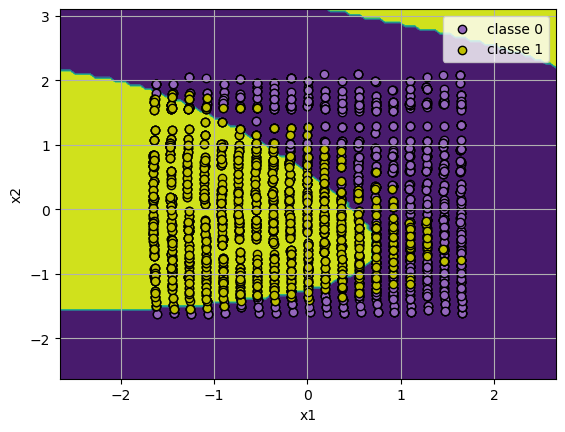

In [40]:
disp_1 = DecisionBoundaryDisplay.from_estimator(model_5,x_test_standard_z,response_method="predict",alpha=1)
disp_1.ax_.scatter(x_test_standard_z[yz_test==0,0],x_test_standard_z[yz_test==0,1],c='tab:purple',label="classe 0",edgecolor="k")
disp_1.ax_.scatter(x_test_standard_z[yz_test==1,0],x_test_standard_z[yz_test==1,1],c='y',label="classe 1",edgecolor="k")
disp_1.ax_.legend()
plt.xlabel("x1")
plt.ylabel("x2")
disp_1.ax_.grid()

Confusion Matrix:
[[1555  197]
 [ 231 1506]]
Accuracy: 87.73%


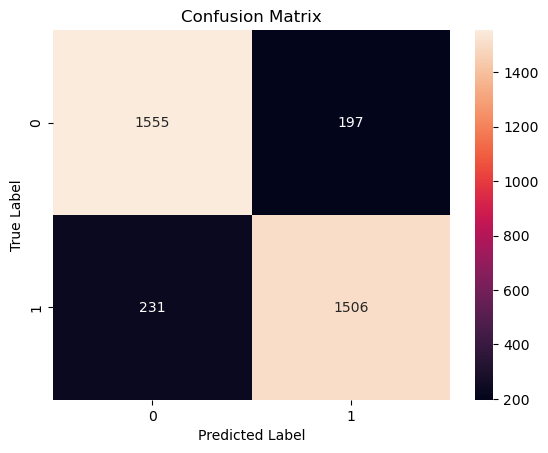

In [41]:
cm = confusion_matrix(y_test, y_pred_1)
acc_reg_test = accuracy_score(y_test, y_pred_1)
print("Confusion Matrix:")
print(cm)
print("Accuracy: {:.2f}%".format(acc_reg_test * 100))


sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

Confusion Matrix:
[[1569  183]
 [ 241 1496]]
Accuracy: 87.85%


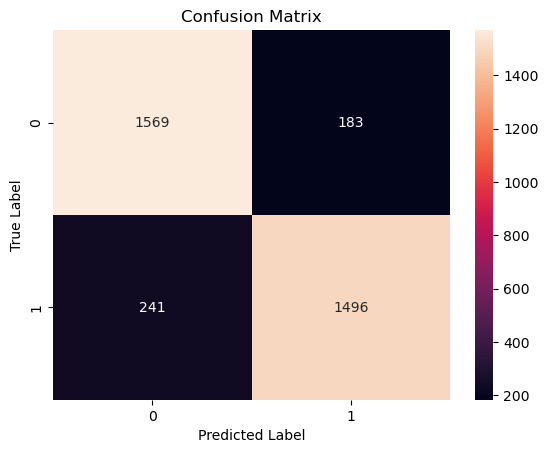

In [42]:
cm = confusion_matrix(y_test, y_pred_2)
acc_reg_test = accuracy_score(y_test, y_pred_2)
print("Confusion Matrix:")
print(cm)
print("Accuracy: {:.2f}%".format(acc_reg_test * 100))


sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

Confusion Matrix:
[[1662   90]
 [  98 1639]]
Accuracy: 94.61%


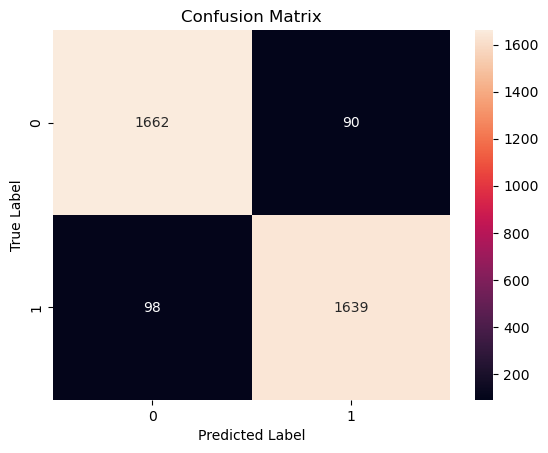

In [43]:
cm = confusion_matrix(y_test, y_pred_3)
acc_reg_test = accuracy_score(y_test, y_pred_3)
print("Confusion Matrix:")
print(cm)
print("Accuracy: {:.2f}%".format(acc_reg_test * 100))


sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

Confusion Matrix:
[[1664   88]
 [ 100 1637]]
Accuracy: 94.61%


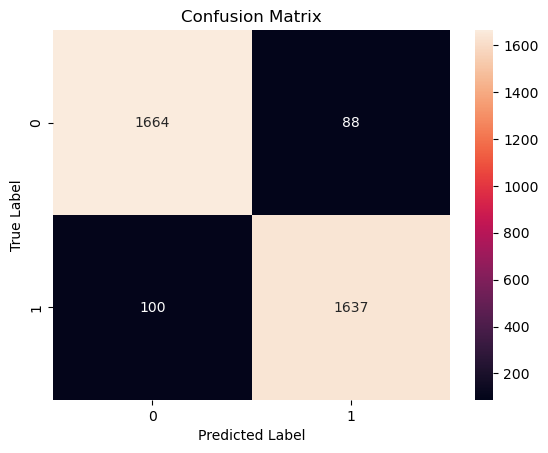

In [44]:
cm = confusion_matrix(y_test, y_pred_4)
acc_reg_test = accuracy_score(y_test, y_pred_4)
print("Confusion Matrix:")
print(cm)
print("Accuracy: {:.2f}%".format(acc_reg_test * 100))


sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

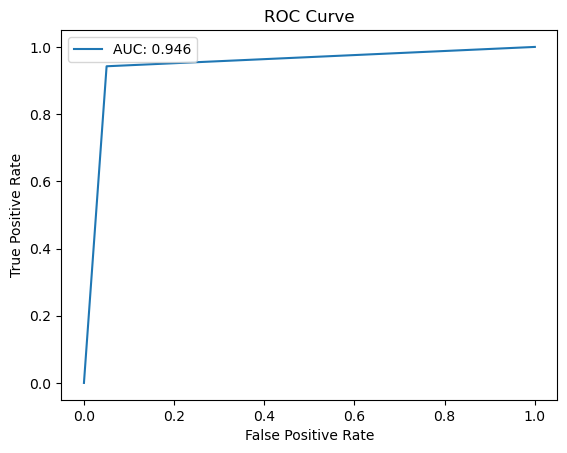

In [45]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_4)
auc = roc_auc_score(y_test, y_pred_4)

plt.plot(fpr, tpr, label='AUC: {:.3f}'.format(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [46]:
accuracy = accuracy_score(y_test, y_pred_1)
accuracy_0 = accuracy_score(y_train, y_pred_1t)
print(f'Accuracy: {accuracy}')
print(f'Accuracy: {accuracy_0}')


report = classification_report(y_test, y_pred_1)
report_0 = classification_report(y_train, y_pred_1t)
print(report)
print(report_0)

Accuracy: 0.8773287474921181
Accuracy: 0.8752239661721494
              precision    recall  f1-score   support

           0       0.87      0.89      0.88      1752
           1       0.88      0.87      0.88      1737

    accuracy                           0.88      3489
   macro avg       0.88      0.88      0.88      3489
weighted avg       0.88      0.88      0.88      3489

              precision    recall  f1-score   support

           0       0.86      0.89      0.88      7007
           1       0.89      0.86      0.87      6946

    accuracy                           0.88     13953
   macro avg       0.88      0.88      0.88     13953
weighted avg       0.88      0.88      0.88     13953



In [47]:
accuracy = accuracy_score(y_test, y_pred_2)
accuracy_0 = accuracy_score(y_train, y_pred_2t)
print(f'Accuracy: {accuracy}')
print(f'Accuracy: {accuracy_0}')

report = classification_report(y_test, y_pred_2)
report_0 = classification_report(y_train, y_pred_2t)
print(report)
print(report_0)

Accuracy: 0.87847520779593
Accuracy: 0.8754389736974127
              precision    recall  f1-score   support

           0       0.87      0.90      0.88      1752
           1       0.89      0.86      0.88      1737

    accuracy                           0.88      3489
   macro avg       0.88      0.88      0.88      3489
weighted avg       0.88      0.88      0.88      3489

              precision    recall  f1-score   support

           0       0.86      0.90      0.88      7007
           1       0.89      0.85      0.87      6946

    accuracy                           0.88     13953
   macro avg       0.88      0.88      0.88     13953
weighted avg       0.88      0.88      0.88     13953



In [48]:
accuracy = accuracy_score(y_test, y_pred_3)
accuracy_0 = accuracy_score(y_train, y_pred_3t)
print(f'Accuracy: {accuracy}')
print(f'Accuracy: {accuracy_0}')


report = classification_report(y_test, y_pred_3)
report_0 = classification_report(y_train, y_pred_3t)
print(report)
print(report_0)

Accuracy: 0.9461163657208369
Accuracy: 0.950763276714685
              precision    recall  f1-score   support

           0       0.94      0.95      0.95      1752
           1       0.95      0.94      0.95      1737

    accuracy                           0.95      3489
   macro avg       0.95      0.95      0.95      3489
weighted avg       0.95      0.95      0.95      3489

              precision    recall  f1-score   support

           0       0.95      0.95      0.95      7007
           1       0.95      0.95      0.95      6946

    accuracy                           0.95     13953
   macro avg       0.95      0.95      0.95     13953
weighted avg       0.95      0.95      0.95     13953



In [49]:
accuracy = accuracy_score(y_test, y_pred_4)
accuracy_0 = accuracy_score(y_train, y_pred_4t)
print(f'Accuracy: {accuracy}')
print(f'Accuracy: {accuracy_0}')


report = classification_report(y_test, y_pred_4)
report_0 = classification_report(y_train, y_pred_4t)
print(report)
print(report_0)

Accuracy: 0.9461163657208369
Accuracy: 0.9509066150648606
              precision    recall  f1-score   support

           0       0.94      0.95      0.95      1752
           1       0.95      0.94      0.95      1737

    accuracy                           0.95      3489
   macro avg       0.95      0.95      0.95      3489
weighted avg       0.95      0.95      0.95      3489

              precision    recall  f1-score   support

           0       0.95      0.95      0.95      7007
           1       0.95      0.95      0.95      6946

    accuracy                           0.95     13953
   macro avg       0.95      0.95      0.95     13953
weighted avg       0.95      0.95      0.95     13953

